In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import arange,maximum,abs,zeros,pi,inf, sin
from numpy.linalg import norm
from matplotlib.pyplot import subplot,figure,plot,grid,axis, loglog, hold, grid, xlabel, ylabel


[[  9.95892735e-01   9.95892735e-01   9.95892735e-01   9.95892735e-01
    9.95892735e-01   9.95892735e-01   9.95892735e-01   9.95892735e-01
    9.95892735e-01   9.95892735e-01   9.95892735e-01]
 [  8.10331958e-01   4.36332593e-01   8.20288199e-01   5.89669912e-01
    7.68418536e-01   5.49976368e-01   7.83453689e-01   5.60265175e-01
    7.79815581e-01   5.57710482e-01   7.80732992e-01]
 [  8.10331958e-01   4.88286600e-01   1.39706380e-01   8.06940834e-02
    3.88904429e-02   1.95921232e-02   9.78584800e-03   4.89635434e-03
    2.44794445e-03   1.22402219e-03   6.12007736e-04]]


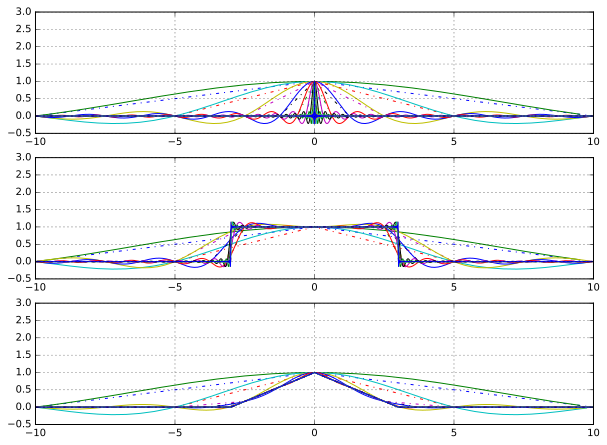

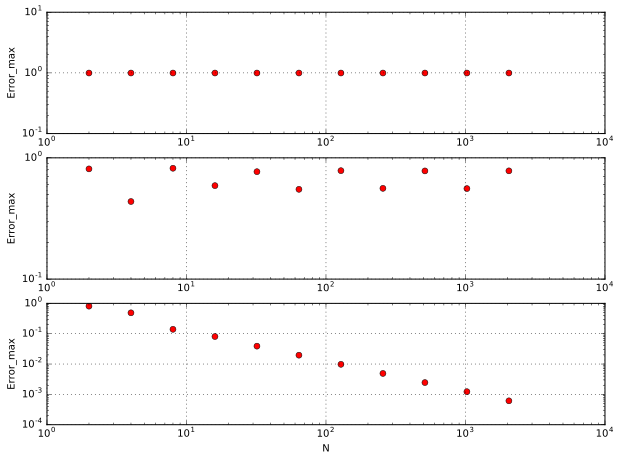

In [4]:
M = 12;
xmax = 10.0 ;
I = 2.0 * xmax
N = 2 ** arange(1,M).astype('float');
H = I / N ;

Error = arange(3*len(N)).reshape(3,len(N)).astype('float')

figure(1,figsize=(10,10))

for pl in range(3):
    for j in range(len(H)):
        h = H[j]
        x = arange(-xmax, xmax + h, h)
        xx = arange(-xmax - h / 20, xmax + h / 20, h / 10)
        subplot(4,1,pl+1)
        if pl==0:
            v = (x==0)                      # delta function
            v_error = (xx == 0)
            #v = exp(sin(x))
            #v_error = exp(sin(xx))
        elif pl==1:
            v = (abs(x) <= 3.0)
            v_error = (abs(xx) <= 3.0) # square wave
        else:
            v = maximum(0.0,1.0-abs(x)/3.0)
            v_error = maximum(0.0, 1.0 - abs(xx) / 3.0) # hat function
        plot(x,v,'-.')
        grid(True)
        p = zeros(len(xx))
        for i in range(len(x)):
            p = p + v[i]*sin(pi*(xx-x[i])/h)/(pi*(xx-x[i])/h)
        Error[pl][j] = norm(v_error - p, inf)
        plot(xx,p)
        axis([-xmax,xmax,-0.5,3]);
         

figure(2,figsize=(10,10))
for i in range(3):
    subplot(4, 1, i + 1)
    loglog(N, Error[i], 'or')
    hold(True)
    grid(True)
    ylabel('Error_max')

xlabel('N')    
    
print Error


# title('');